In [1]:
from __future__ import print_function
import numpy as np
np.random.seed(1337)  # for reproducibility

from keras.preprocessing import sequence
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Lambda
from keras.layers import Embedding
from keras.layers import Convolution1D,MaxPooling1D, Flatten
from keras.datasets import imdb
from keras import backend as K
from sklearn.model_selection import train_test_split
import pandas as pd
from keras.utils.np_utils import to_categorical

from sklearn.preprocessing import Normalizer
from keras.models import Sequential
from keras.layers import Convolution1D, Dense, Dropout, Flatten, MaxPooling1D
from keras.utils import np_utils
import numpy as np
import h5py
from keras import callbacks
from keras.layers import LSTM, GRU, SimpleRNN, Bidirectional
from keras.callbacks import CSVLogger
from keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau, CSVLogger

traindata = pd.read_csv('/home/ritika/NetworkIntrusionDetection/UNSW-NB15 - CSV Files/a part of training and testing set/UNSW_NB15_training-set.csv')
testdata = pd.read_csv('/home/ritika/NetworkIntrusionDetection/UNSW-NB15 - CSV Files/a part of training and testing set/UNSW_NB15_testing-set.csv')

traindata=traindata.drop('id',axis=1)
testdata=testdata.drop('id',axis=1)

from sklearn.preprocessing import LabelEncoder
lb_make = LabelEncoder()

traindata['proto'] = lb_make.fit_transform(traindata['proto'])
traindata['service'] = lb_make.fit_transform(traindata['service'])
traindata['state'] = lb_make.fit_transform(traindata['state'])

testdata['proto'] = lb_make.fit_transform(testdata['proto'])
testdata['service'] = lb_make.fit_transform(testdata['service'])
testdata['state'] = lb_make.fit_transform(testdata['state'])

X = traindata.iloc[:,1:42]
Y = traindata.iloc[:,-1]
x = testdata.iloc[:,1:42]
y = testdata.iloc[:,-1]

Using TensorFlow backend.
/home/ritika/.virtualenvs/pythree/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/ritika/.virtualenvs/pythree/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home/ritika/.virtualenvs/pythree/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/home/ritika/.virtualen

In [2]:
Arr = X.values
arr = x.values

import librosa
Arr_Delta = librosa.feature.delta(Arr)
arr_delta = librosa.feature.delta(arr)

Delta1 = pd.DataFrame(Arr_Delta)
delta1 = pd.DataFrame(arr_delta)

XDelta1 = pd.concat([X, Delta1], axis=1)
xdelta1 = pd.concat([x, delta1], axis=1)

scaler = Normalizer().fit(XDelta1)
XDelta1 = scaler.transform(XDelta1)
scaler = Normalizer().fit(xdelta1)
xdelta1 = scaler.transform(xdelta1)

Y = np.array(Y)
y = np.array(y)

XDelta1 = np.reshape(XDelta1, (XDelta1.shape[0],XDelta1.shape[1],1))
xdelta1 = np.reshape(xdelta1, (xdelta1.shape[0],xdelta1.shape[1],1))

In [3]:
cnn = Sequential()
cnn.add(Convolution1D(64, 3, border_mode="same",activation="relu",input_shape=(82, 1)))
cnn.add(MaxPooling1D(pool_length=(2)))
cnn.add(Flatten())
cnn.add(Dense(128, activation="relu"))
cnn.add(Dropout(0.5))
cnn.add(Dense(1, activation="sigmoid"))
cnn.compile(loss="binary_crossentropy", optimizer="adam",metrics=['accuracy'])
cnn.summary()

/home/ritika/.virtualenvs/pythree/lib/python3.7/site-packages/ipykernel_launcher.py:2: UserWarning: Update your `Conv1D` call to the Keras 2 API: `Conv1D(64, 3, activation="relu", input_shape=(82, 1), padding="same")`
  
/home/ritika/.virtualenvs/pythree/lib/python3.7/site-packages/ipykernel_launcher.py:3: UserWarning: Update your `MaxPooling1D` call to the Keras 2 API: `MaxPooling1D(pool_size=2)`
  This is separate from the ipykernel package so we can avoid doing imports until


Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_1 (Conv1D)            (None, 82, 64)            256       
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (None, 41, 64)            0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 2624)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               336000    
_________________________________________________________________
dropout_1 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 129       
Total params: 336,385
Trai

In [4]:
history = cnn.fit(XDelta1, Y, epochs=200, validation_data=(xdelta1, y))


Train on 175341 samples, validate on 82332 samples
Epoch 1/200
175341/175341 [==============================] - 50s 285us/step - loss: 0.3941 - accuracy: 0.7975 - val_loss: 0.5357 - val_accuracy: 0.6876
Epoch 2/200
175341/175341 [==============================] - 51s 292us/step - loss: 0.3657 - accuracy: 0.8208 - val_loss: 0.5619 - val_accuracy: 0.6880
Epoch 3/200
175341/175341 [==============================] - 48s 272us/step - loss: 0.3605 - accuracy: 0.8228 - val_loss: 0.5545 - val_accuracy: 0.6867
Epoch 4/200
175341/175341 [==============================] - 46s 264us/step - loss: 0.3568 - accuracy: 0.8249 - val_loss: 0.5351 - val_accuracy: 0.6888
Epoch 5/200
175341/175341 [==============================] - 47s 266us/step - loss: 0.3551 - accuracy: 0.8267 - val_loss: 0.5431 - val_accuracy: 0.7011
Epoch 6/200
175341/175341 [==============================] - 47s 265us/step - loss: 0.3530 - accuracy: 0.8271 - val_loss: 0.5405 - val_accuracy: 0.7033
Epoch 7/200
175341/175341 [=========

175341/175341 [==============================] - 83s 473us/step - loss: 0.2965 - accuracy: 0.8710 - val_loss: 0.5206 - val_accuracy: 0.7326
Epoch 106/200
175341/175341 [==============================] - 83s 475us/step - loss: 0.2951 - accuracy: 0.8708 - val_loss: 0.5403 - val_accuracy: 0.7306
Epoch 107/200
175341/175341 [==============================] - 84s 477us/step - loss: 0.2962 - accuracy: 0.8703 - val_loss: 0.5166 - val_accuracy: 0.7292
Epoch 108/200
175341/175341 [==============================] - 83s 474us/step - loss: 0.2939 - accuracy: 0.8713 - val_loss: 0.5077 - val_accuracy: 0.7323
Epoch 109/200
175341/175341 [==============================] - 84s 477us/step - loss: 0.2945 - accuracy: 0.8707 - val_loss: 0.5173 - val_accuracy: 0.7329
Epoch 110/200
175341/175341 [==============================] - 83s 475us/step - loss: 0.2937 - accuracy: 0.8710 - val_loss: 0.5327 - val_accuracy: 0.7109
Epoch 111/200
175341/175341 [==============================] - 83s 476us/step - loss: 0.29

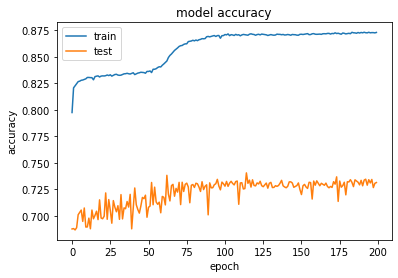

In [5]:
import matplotlib.pyplot as plt
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.savefig('Word2Vec300+10epochs+Accuracy+0,1.png')
plt.show()

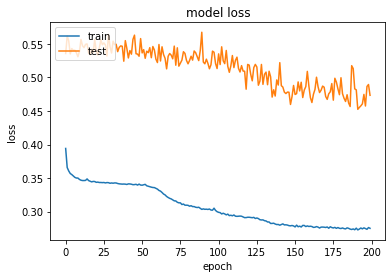

In [6]:
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.savefig('Word2Vec300+10epochs+Loss+0,1.png')
plt.show()

In [8]:
from sklearn.metrics import accuracy_score,classification_report
predictions = cnn.predict([xdelta1])
predictions = [0 if i<0.5 else 1 for i in predictions]
print("Accuracy: ",accuracy_score(y,predictions))
from sklearn.metrics import confusion_matrix

print("Classification Report: \n",classification_report(y,predictions))
conmat = np.array(confusion_matrix(y, predictions, labels=[0,1]))
confusion = pd.DataFrame(conmat, index=['negative', 'positive'],
                         columns=['predicted_negative','predicted_positive'])
print (confusion)

Accuracy:  0.731428849050187
Classification Report: 
               precision    recall  f1-score   support

           0       0.96      0.42      0.58     37000
           1       0.68      0.99      0.80     45332

    accuracy                           0.73     82332
   macro avg       0.82      0.70      0.69     82332
weighted avg       0.80      0.73      0.70     82332

          predicted_negative  predicted_positive
negative               15555               21445
positive                 667               44665
